In [3]:
import pickle
import numpy as np

In [2]:
with open("feedback_debug/ppo_HalfCheetah-v5_1337.pkl", "rb" ) as stuff:
    data = pickle.load(stuff)

In [3]:
data.keys()

dict_keys(['segments', 'ratings', 'preferences', 'opt_gaps', 'demos', 'corrections'])

In [4]:
len(data["segments"])

189

In [5]:
import matplotlib.pyplot as plt

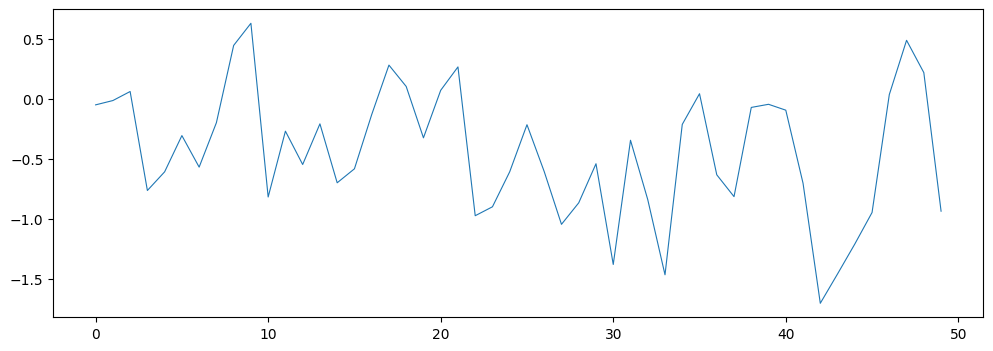

In [6]:
plt.figure(figsize=(12, 4))
plt.plot([d[2] for d in data["segments"][0]], linestyle='-', linewidth=0.8, label="Reward")

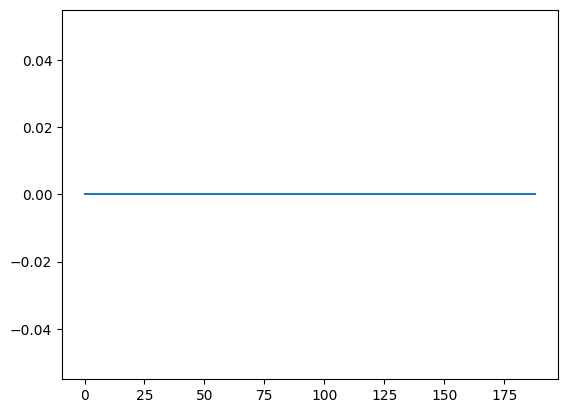

In [7]:
index = np.argsort([np.sum([e[2] for e in d]) for d in data["demos"]])
#index = np.arange(len(data["segments"]))
plt.plot(np.array([np.sum([e[2] for e in d]) for d in data["demos"]]))#[index])

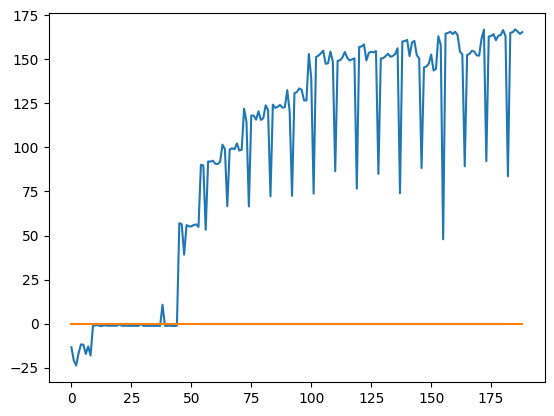

In [9]:
def discounted_sum_numpy(rewards, discount_factor):
    rewards = np.array(rewards)
    n = len(rewards)
    discount_factors = discount_factor ** np.arange(n)
    return np.sum(rewards * discount_factors)

plt.plot(-np.array([d for d in data["opt_gaps"]]))#[index])
plt.plot(np.array([discounted_sum_numpy([e[2] for e in d], 0.98) for d in data["demos"]]))#[index])

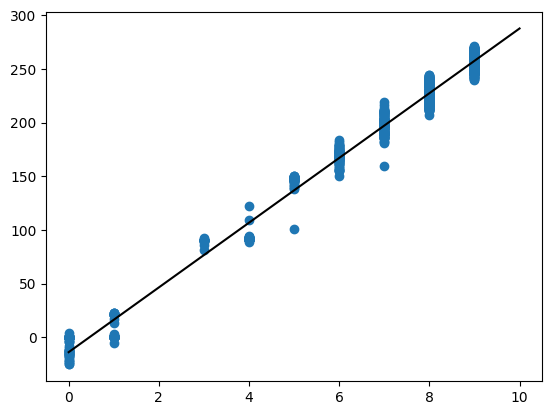

In [9]:
x = np.array([d for d in data["ratings"]])[index]
y = np.array([np.sum([e[2] for e in d]) for d in data["segments"]])[index]
plt.scatter(x, y)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(0, 10, num=100)
# Plot regression line
plt.plot(xseq, a + b * xseq, color="k", lw=1.5)

-0.05467260971091768
-0.05467274205009024


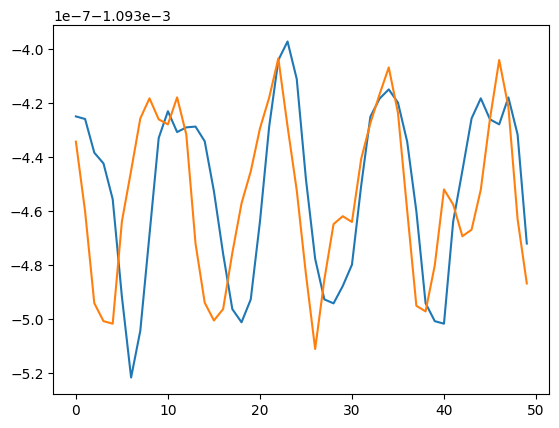

In [13]:
index = data["preferences"][14][0]
index_2 = data["preferences"][14][1]
plt.plot([e[2] for e in data["segments"][index]])
plt.plot([e[2] for e in data["segments"][index_2]])
print(np.sum([e[2] for e in data["segments"][index]]))
print(np.sum([e[2] for e in data["segments"][index_2]]))

In [88]:
data["segments"][index][0]

(array([[-1.04728226e-01, -5.44831819e-02, -1.76762770e-01,
          2.88027477e-01,  1.92069143e-01,  2.11626641e-01,
          3.84918901e-01, -2.98112077e-01, -6.72487522e-05,
         -9.00471824e-06, -1.81214578e-05,  5.05520546e-05,
          5.73470316e-05,  4.44694590e-05, -1.20636655e-04,
         -1.23927343e-04, -1.19864766e-04]]),
 array([-0.40164286,  0.47157237,  0.3895389 ,  0.2783105 ,  0.86001045,
        -0.4591731 ], dtype=float32),
 -0.15640050581922163,
 False)

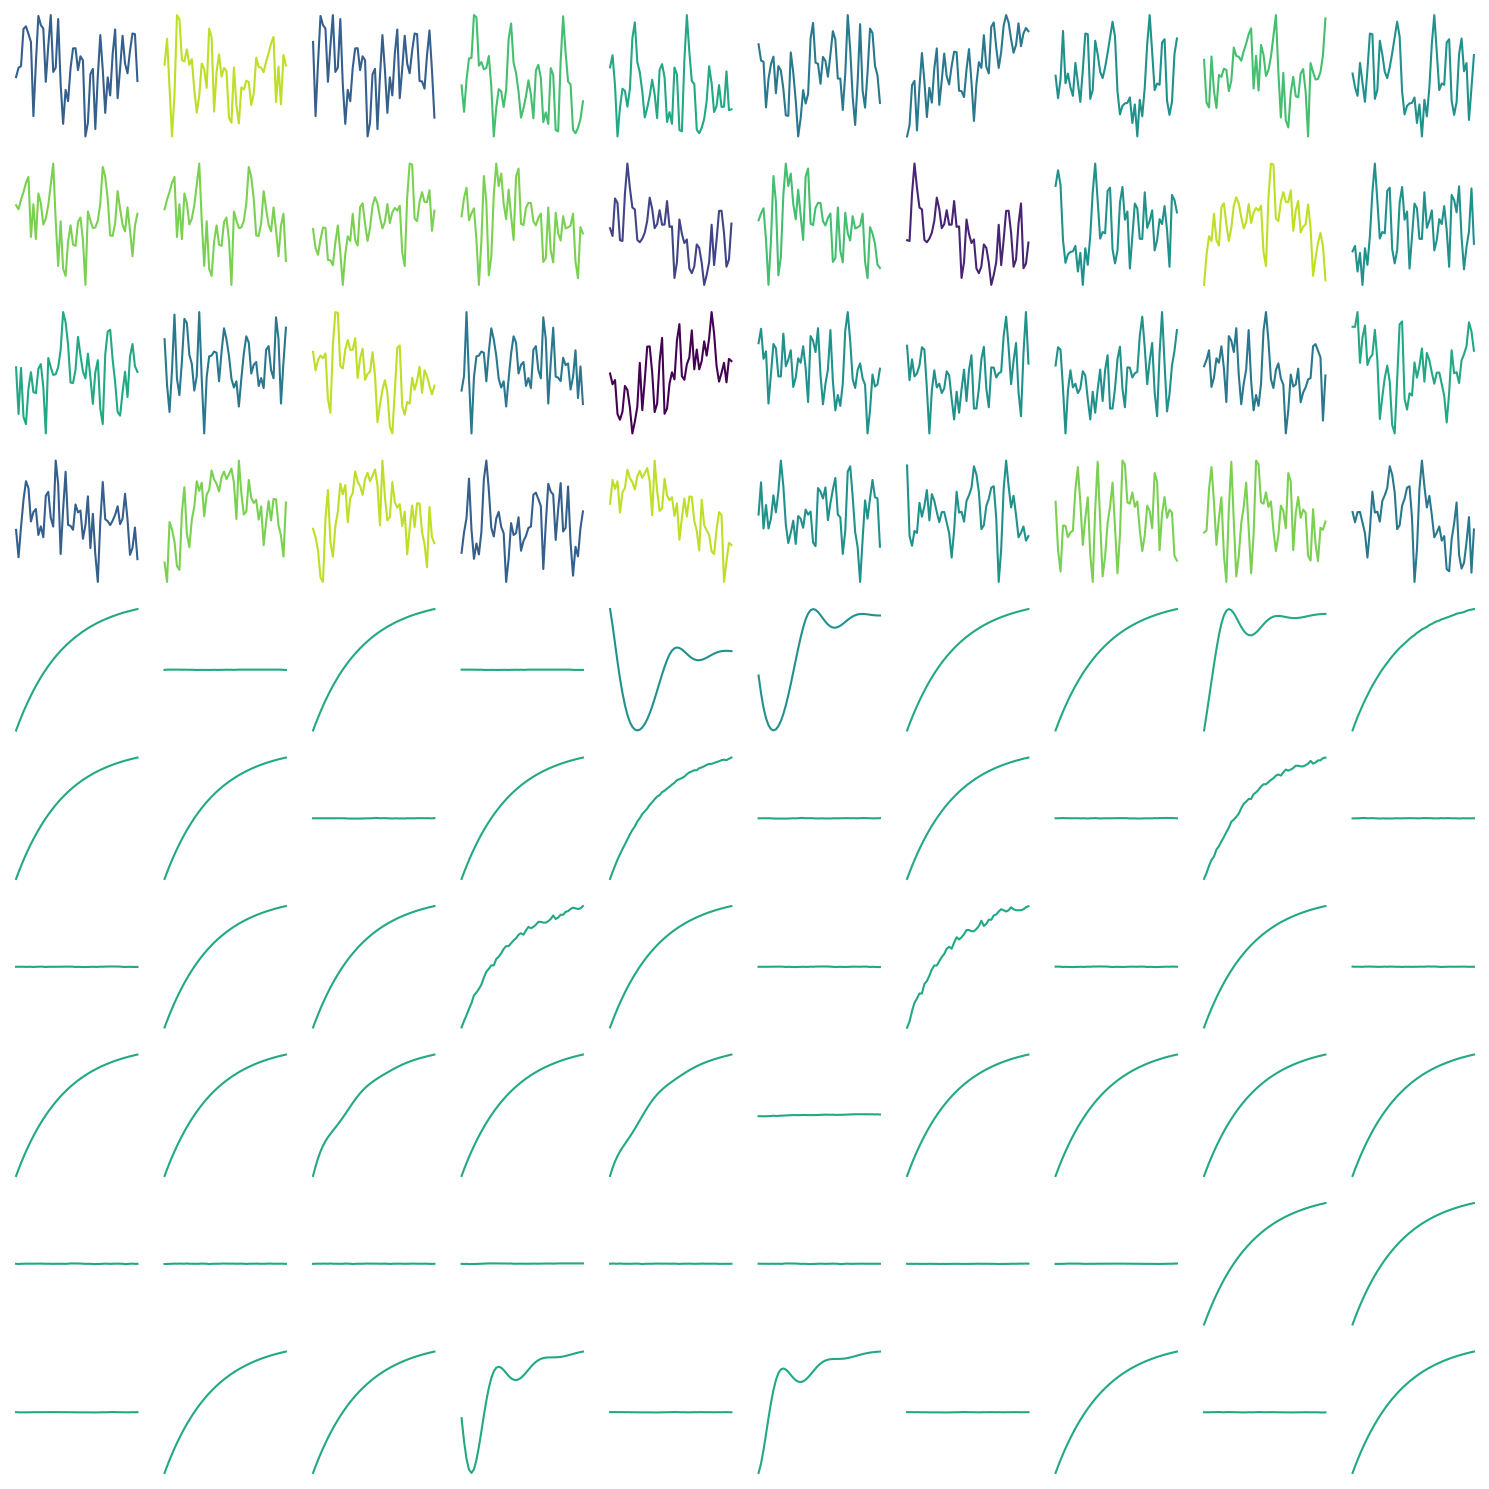

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 10x10 grid of subplots
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
cmap = plt.cm.viridis 
norm = plt.Normalize(0, 10)

# Plot each timeseries on its respective subplot
for i in range(10):
    for j in range(10):
        ax = axes[i, j]
        value = data["ratings"][i * 10 + j]
        color = cmap(norm(value))
        ax.plot([d[2] for d in data["segments"][i * 10 + j]], color=color[:3])
        ax.axis('off')  # Turn off axes for a cleaner look

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
opt_gaps = data["opt_gaps"]
plt.hist(opt_gaps, bins=10)

In [ ]:
def equal_depth_binning_with_indices(data, num_bins):
    # Sort the data and get the original indices
    sorted_indices = np.argsort(data)
    sorted_data = np.sort(data)
    
    # Determine the number of elements per bin
    bin_size = len(data) // num_bins
    remainder = len(data) % num_bins
    
    bins = []
    bin_indices = np.zeros(len(data), dtype=int)
    start = 0
    
    for i in range(num_bins):
        end = start + bin_size + (1 if i < remainder else 0)
        bin_indices[sorted_indices[start:end]] = i + 1
        bins.append(sorted_data[start:end])
        start = end
    
    return bin_indices, bins

max_rating = 10
ratings = max_rating - equal_depth_binning_with_indices(opt_gaps, max_rating)[0]

In [ ]:
def equal_width_binning_with_indices(data, num_bins):
    data = np.array(data)
    # Find the minimum and maximum values in the data
    min_val, max_val = np.min(data), np.max(data)
    
    # Calculate the width of each bin
    bin_width = (max_val - min_val) / num_bins
    
    # Create bin edges
    bin_edges = np.linspace(min_val, max_val, num_bins + 1)
    
    # Use numpy's digitize function to assign bin indices
    bin_indices = np.digitize(data, bin_edges[:-1])
    
    # Create the bins
    bins = [data[(bin_indices == i)] for i in range(1, num_bins + 1)]
    
    return bin_indices, bins

max_rating = 10
ratings2 = max_rating - equal_width_binning_with_indices(opt_gaps, max_rating)[0]

In [ ]:
#plt.plot(opt_gaps)
plt.plot(ratings)
plt.plot(ratings2)

In [ ]:
def discounted_sum_numpy(rewards, discount_factor):
    rewards = np.array(rewards)
    n = len(rewards)
    discount_factors = discount_factor ** np.arange(n)
    return np.sum(rewards * discount_factors)

segments = data["segments"]

for seg in segments:
    pass
    #print(discounted_sum_numpy([s[2] for s in seg], 0.98) - discounted_sum_numpy([s[2] for s in seg[:-1]], 0.98))

In [ ]:
import pandas as pd

evals = np.load("../main/logs/ppo/Swimmer-v5_1/evaluations.npz")

In [ ]:
index = np.argsort(evals["results"].flatten())
plt.plot(evals["results"].flatten()[index])

In [ ]:
plt.plot(evals["ep_lengths"].flatten()[index])

In [ ]:
[d[1][1] for d in data["segments"][0]]

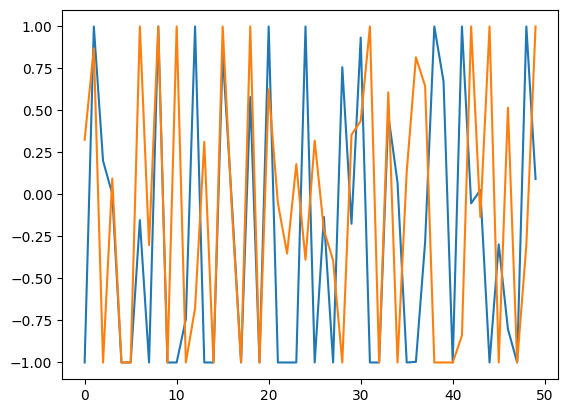

In [25]:
plt.plot([d[1][0] for d in data["segments"][-5]])
plt.plot([d[1][-1] for d in data["demos"][-5]])

In [20]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

# Compute statistics env per env (due to memory constraints)
results = {}

# helper function
def discounted_sum_numpy(rewards, discount_factor):
    rewards = np.array(rewards)
    n = len(rewards)
    discount_factors = discount_factor ** np.arange(n)
    return np.sum(rewards * discount_factors)

# get all feedback files matching the environment (they contain the name and the seed)
env = "HalfCheetah-v5"
discount_factors = {
    'HalfCheetah-v5': 0.99,
    'Hopper-v5': 0.999,
    'Swimmer-v5': 0.9999,
    'Ant-v5': 0.98,
    'Walker2d-v5': 0.99,
    'ALE/BeamRider-v5': 0.99,
    'ALE/MsPacman-v5': 0.99,
    'ALE/Enduro-v5': 0.99
}

# Load data
file = f"ppo_{env}_12.pkl"
print(file)
seed = file.split('.')[0].split('_')[-1]
with open(f"feedback/{file}", 'rb') as f:
    data = pkl.load(f)
    if env not in results:
        results[env] = []
    
    # compute discounted sum of rewards
    #index = np.argsort([discounted_sum_numpy([e[2] for e in d], discount_factors[env]) for d in data["segments"]])
    #index1 = np.argsort([discounted_sum_numpy([e[2] for e in d], discount_factors[env]) for d in data["demos"]])
    ordered_gt_rews = np.array([discounted_sum_numpy([e[2] for e in d], discount_factors[env]) for d in data["segments"]])#[index]

    # demo rewards
    ordered_demo_rews = np.array([discounted_sum_numpy([e[2] for e in d], discount_factors[env]) for d in data["demos"]])#[index]

    model_indices = np.array([d[0][-1] for d in data["demos"]])
    
    # store data
    results[env].append((ordered_gt_rews, ordered_demo_rews))

ppo_HalfCheetah-v5_12.pkl


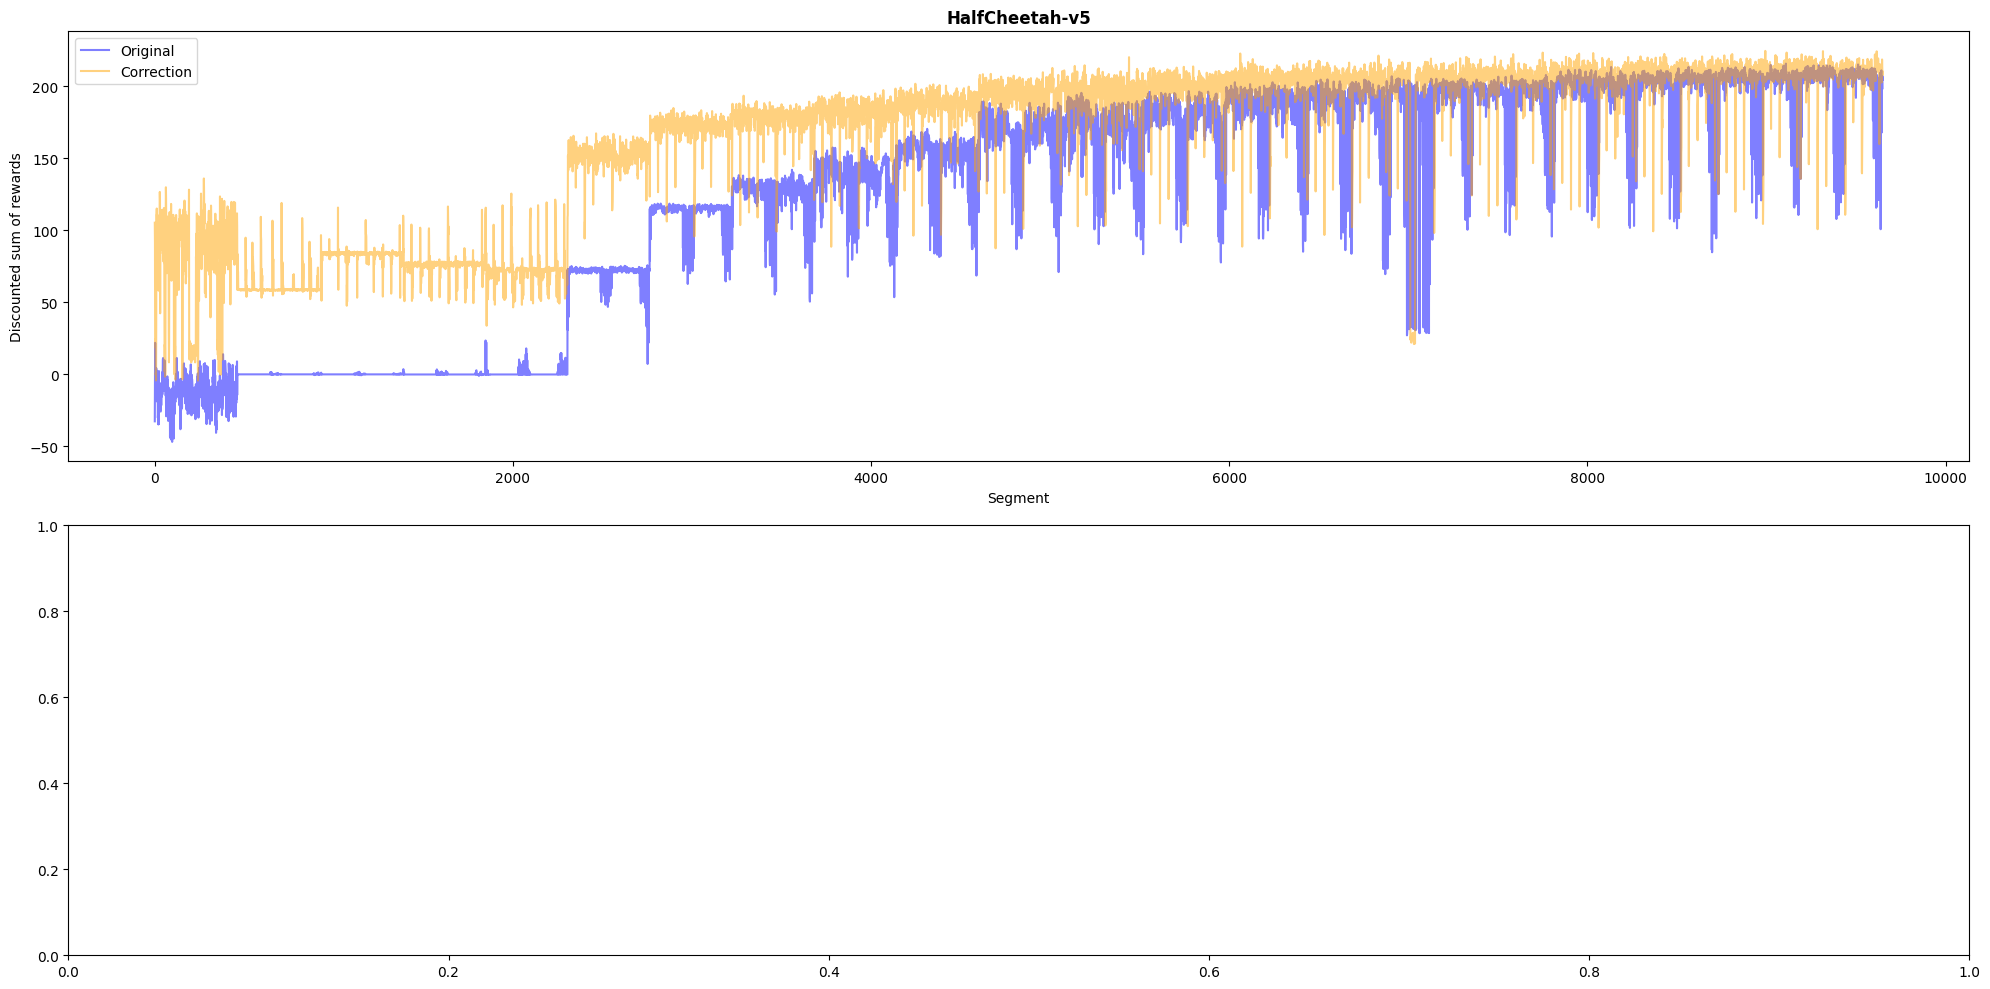

In [21]:
# Instead of ratings, we now want to compare the total rewards between original data ("segments") and demonstrations ("demos").
# make grid plot showing the total rewards for each segment and demo

colors = ['red', 'green', 'blue', 'orange']

fig, axs = plt.subplots(2, 1, figsize=(20, 10))

for i, env in enumerate([env]):
    ax = axs[i]
    for data in results[env]:
        ax.plot(np.arange(len(data[0])), data[0], label="Original", alpha=0.5, color='blue')
        ax.plot(np.arange(len(data[1])), data[1], label="Correction", alpha=0.5, color='orange')
        #ax.scatter(np.arange(len(data[3])), data[3], label="Correction", alpha=0.5, color=[colors[c] for c in model_indices])
    ax.set_title(env, fontweight='bold')
    ax.set_xlabel("Segment")
    ax.set_ylabel("Discounted sum of rewards")
    ax.legend()

plt.tight_layout()

plt.savefig("naw_segment_vs_demo_rewards.png")

In [25]:
import numpy as np
vec = np.array([0.9, 0.3, 0.8, 0.5, 0.2, 0.7, 0.1])

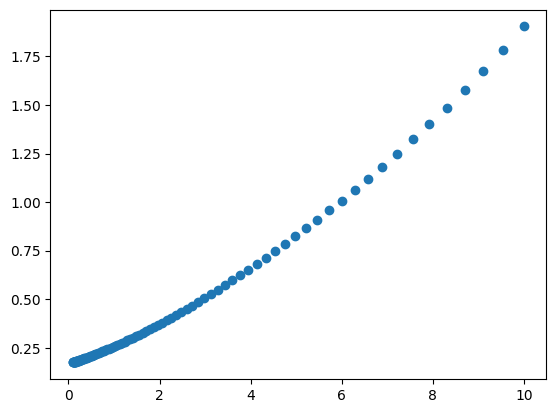

In [44]:
import matplotlib.pyplot as plt

plt.scatter(np.logspace(-1, 1, 100), [np.exp(vec[0] * beta) / np.sum(np.exp(vec[1:] * beta)) for beta in np.logspace(-1, 1, 100)])

In [56]:
import torch

a = torch.zeros(1, 2, 2, 2)
a[0,0] = 4

In [57]:
a

tensor([[[[4., 4.],
          [4., 4.]],

         [[0., 0.],
          [0., 0.]]]])

In [72]:
import pickle as pkl
from sklearn.cluster import MiniBatchKMeans
import numpy as np

with open("feedback_descript/ppo_Hopper-v5_12.pkl", "rb") as file:
    data = pkl.load(file)

In [73]:
all_obs = []
for idx, seg in enumerate(data["segments"]):
    obs = np.array([np.concatenate((s[0].squeeze(0),s[1])) for s in seg])
    all_obs.append(obs)
states = np.concatenate(all_obs, axis=0)

# Assuming your data is in a numpy array called 'states'
# with shape (500000, feature_dimension)

# Initialize the Mini-Batch K-Means model
n_clusters = 10000
batch_size = 1000  # Adjust based on your memory constraints
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=42)

# Fit the model to your data
kmeans.fit(states)

# Get cluster assignments for each state
cluster_assignments = kmeans.predict(states)

In [74]:
# Compute cluster representatives by averaging
cluster_representatives = []
for i in range(n_clusters):
    cluster_states = states[cluster_assignments == i]
    if not np.any(np.isnan(np.mean(cluster_states, axis=0))):
        cluster_representatives.append(np.mean(cluster_states, axis=0))
cluster_representatives = np.array(cluster_representatives)

/home/metz/rlhfblender_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/metz/rlhfblender_env/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


## Plot Clusters

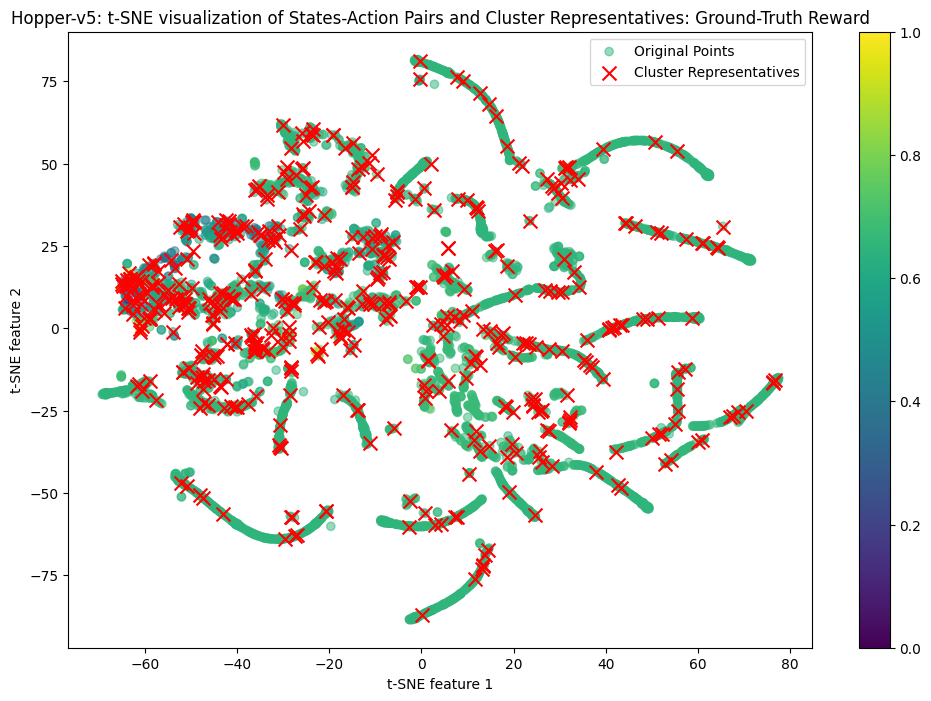

In [75]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming you have:
# - states: your original data (500000, feature_dimension)
# - cluster_representatives: your cluster centroids (10000, feature_dimension)
# - cluster_assignments: cluster assignments for each original point

all_obs = []
all_rews = []
for idx, seg in enumerate(data["segments"]):
    obs = np.array([np.concatenate((s[0].squeeze(0),s[1])) for s in seg])
    all_obs.append(obs)
    all_rews.append([s[2] for s in seg])
    
states = np.concatenate(all_obs, axis=0)
rews = np.concatenate(all_rews, axis=0) 

# 1. Prepare the data
n_sample = 5000  # Number of original points to sample
n_representatives = 500  # Number of cluster representatives to plot
# Sample from original points
sampled_indices = np.random.choice(states.shape[0], n_sample, replace=False)
sampled_points = states[sampled_indices]
sampled_rewards = rews[sampled_indices]

# Sample from cluster representatives
rep_indices = np.random.choice(cluster_representatives.shape[0], n_representatives, replace=False)
sampled_representatives = cluster_representatives[rep_indices]

# Combine sampled points and representatives
combined_data = np.vstack([sampled_points, sampled_representatives])

# 2. Normalize the data
scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data)

# 3. Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(combined_data_scaled)

# 4. Prepare for plotting
tsne_original = tsne_results[:n_sample]
tsne_representatives = tsne_results[n_sample:]

# 5. Plot
plt.figure(figsize=(12, 8))
plt.scatter(tsne_original[:, 0], tsne_original[:, 1], c=sampled_rewards, cmap='viridis', alpha=0.5, label='Original Points')
plt.scatter(tsne_representatives[:, 0], tsne_representatives[:, 1], c=[cr[1] for sampled_representatives], marker='x', s=100, label='Cluster Representatives')
plt.legend()
plt.title('Hopper-v5: t-SNE visualization of States-Action Pairs and Cluster Representatives: Ground-Truth Reward')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar()

plt.savefig("descr_feedback_gt_rews_hopper.png")

In [77]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
import os
import torch

env_name = "Hopper-v5"
environment = gym.make(env_name)

expert_model_path = f"../main/gt_agents/ppo/{env_name}_1"
if os.path.isfile(os.path.join(expert_model_path, env_name, "vecnormalize.pkl")):
    norm_env = VecNormalize.load(os.path.join(expert_model_path, env_name, "vecnormalize.pkl"), DummyVecEnv([lambda: environment]))
else:
    norm_env = None
expert_model = PPO.load(os.path.join(expert_model_path, "best_model.zip"), norm_env)

all_obs = []
for idx, seg in enumerate(data["segments"]):
    obs = np.array([s[0].squeeze(0) for s in seg])
    all_obs.append(obs)
    all_rews.append([s[2] for s in seg])
    
observation = np.concatenate(all_obs, axis=0)

if norm_env is not None:
    observation = norm_env.normalize_obs(observation)

observation = expert_model.policy.obs_to_tensor(observation)[0]
with torch.no_grad():
    values = expert_model.policy.predict_values(observation)

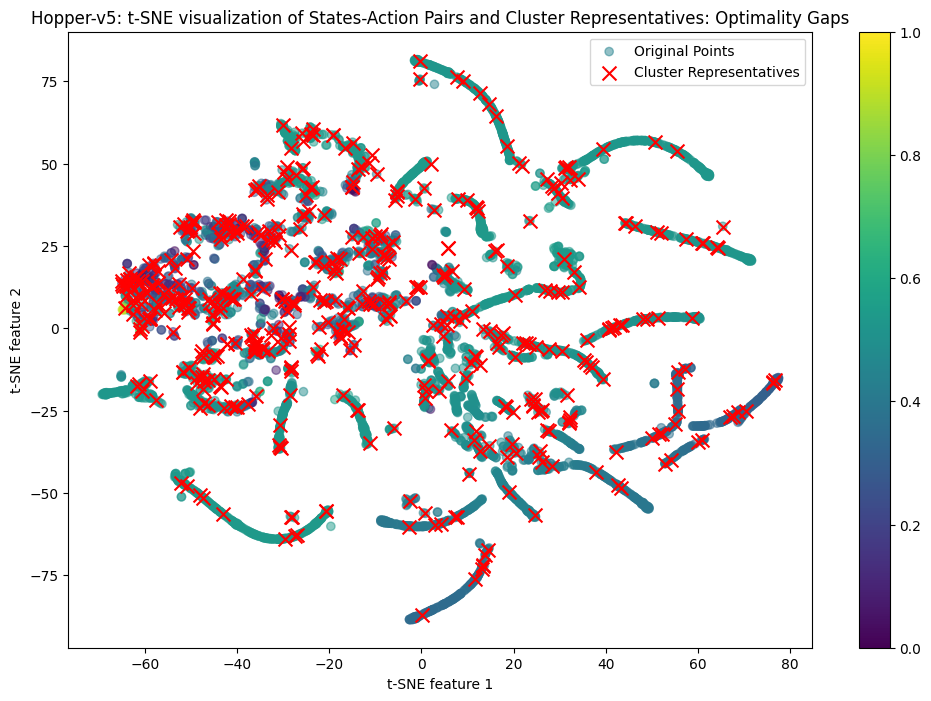

In [91]:
sampled_values = values[sampled_indices].cpu().numpy()
opt_gaps = values[:-1].cpu().numpy() - rews[:1] + 0.999 * values[1:].cpu().numpy()
sampled_opt_gaps = opt_gaps[sampled_indices]

plt.figure(figsize=(12, 8))
plt.scatter(tsne_original[:, 0], tsne_original[:, 1], c=sampled_values, cmap='viridis', alpha=0.5, label='Original Points')
plt.scatter(tsne_representatives[:, 0], tsne_representatives[:, 1], c='red', marker='x', s=100, label='Cluster Representatives')
plt.legend()
plt.title('Hopper-v5: t-SNE visualization of States-Action Pairs and Cluster Representatives: Optimality Gaps')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar()

plt.savefig("descr_feedback_opt_gaps_hopper.png")

In [92]:
np.corrcoef(opt_gaps.squeeze(), rews[:-1])

array([[1.        , 0.26859036],
       [0.26859036, 1.        ]])

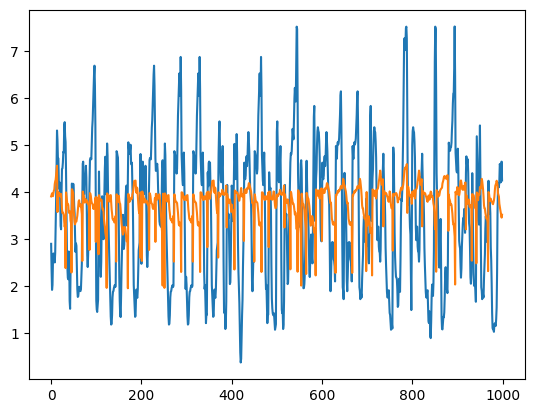

In [96]:
plt.plot(opt_gaps[:1000])
plt.plot(rews[:1000]+3)